## Set Up and Testing

In [1]:
!pip install qiskit
!pip install qiskit[visualization]

  Created wheel for qiskit: filename=qiskit-0.18.0-py3-none-any.whl size=2901 sha256=dad4bfe82ede82e8d2223c54bf82dd0a384e7e8aebba31c72c7044a3a0fca88e
  Stored in directory: c:\users\asn\appdata\local\pip\cache\wheels\d0\6a\08\99a2480dcdd5e4b7649a0fcfd3d8509eff4b4a7ee0f7d0cb0c
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24085 sha256=26ed52e5a533a98d98fc5a48b9dcef934cffcdd51d72ea28d3a96cc89cccc8e6
  Stored in directory: c:\users\asn\appdata\local\pip\cache\wheels\07\27\db\1222c80eb1e431f3d2199c12569cb1cac60f562a451fe30479
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78597 sha256=28e5e7475649cc29182d266dd91e75f073ab16e8382c7eaea8aa12c4e05c2b79
  Stored in directory: c:\users\asn\appdata\local\pip\cache\wheels\a4\61\fd\c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created wheel for marshmallow-polyfield: filename=marshmallow_polyfield-5.9-py3-none-any.whl size=8542 sha256=4278d4703231554201f499d3eac59d989

In [3]:
import qiskit
qiskit.__version__

'0.13.0'

In [19]:
#qiskit.IBMQ.save_account('My_API_Token')
#
provider = qiskit.IBMQ.load_account()
from qiskit.tools.jupyter import *
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *


ibmqfactory.load_account:WARNING:2020-04-17 14:26:56,521: Credentials are already in use. The existing account in the session will be replaced.


┌───┐          ┌───┐
q_0: ┤ H ├───────■──┤ H ├
     ├───┤┌───┐┌─┴─┐└───┘
q_1: ┤ X ├┤ H ├┤ X ├─────
     └───┘└───┘└───┘

In [20]:
circ = QuantumCircuit(2)
circ.h(0)
circ.x(1)
circ.h(1)

# identity function
circ.cx(0, 1)

circ.h(0)
circ.draw()

┌───┐          ┌───┐
q_0: ┤ H ├───────■──┤ H ├
     ├───┤┌───┐┌─┴─┐└───┘
q_1: ┤ X ├┤ H ├┤ X ├─────
     └───┘└───┘└───┘

In [21]:
meas = QuantumCircuit(2, 1)
meas.barrier(range(2))
meas.measure(range(1),range(1))
qc = circ+meas
qc.draw()



┌───┐          ┌───┐ ░ ┌─┐
q_0: ┤ H ├───────■──┤ H ├─░─┤M├
     ├───┤┌───┐┌─┴─┐└───┘ ░ └╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────░──╫─
     └───┘└───┘└───┘      ░  ║ 
c_0: ════════════════════════╩═

In [22]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)


{'1': 1024}


## Problem 2

Run set up (code block directly below) once before running other code blocks 

In [20]:
#set up
import qiskit
provider = qiskit.IBMQ.load_account()
from qiskit.tools.jupyter import *
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization import plot_histogram
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

ibmqfactory.load_account:WARNING:2020-04-17 14:48:41,957: Credentials are already in use. The existing account in the session will be replaced.


The function `prepare(N)` prepares a quantum circuit with the appropriate states as if caused by phase kickback varphi

In [78]:
import numpy as np
import math

varphi = np.random.rand()
#varphi = math.floor(varphi*8)/8                         #uncomment to get exact binary fraction varphi
print ("varphi =", varphi)


def prepare(varphi):
    circ = QuantumCircuit(3,3)
    circ.h(0)
    circ.h(1)
    circ.h(2)
    circ.u1(2*math.pi*4*varphi, 0)
    circ.u1(2*math.pi*2*varphi, 1)
    circ.u1(2*math.pi*1*varphi, 2)
    return circ
 

#explanation of R_k the hermitian conjugate of R_k = R_k^{dagger}, is equivalent to taking the complex conjugate of R_k elementwise
#, the only element affected is e^... and conjugate of e^... is e^-...

circ = prepare(varphi)
circ.h(0)
circ.cu1(-1*2*math.pi/4, 0, 1)
circ.h(1)
circ.cu1(-1*2*math.pi/8, 0, 2)
circ.cu1(-1* 2*math.pi/4, 1, 2)
circ.h(2)
circ.barrier(range(3))
circ.measure(range(3), range(3))
circ.draw()





varphi = 0.12189296243536829


┌───┐ ┌────────────┐┌───┐                                   ░ ┌─┐      
q_0: ┤ H ├─┤ U1(3.0635) ├┤ H ├─■────────────■────────────────────░─┤M├──────
     ├───┤ ├────────────┤└───┘ │-pi/2 ┌───┐ │                    ░ └╥┘┌─┐   
q_1: ┤ H ├─┤ U1(1.5318) ├──────■──────┤ H ├─┼───────■────────────░──╫─┤M├───
     ├───┤┌┴────────────┤             └───┘ │-pi/4  │-pi/2 ┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ U1(0.76588) ├───────────────────■───────■──────┤ H ├─░──╫──╫─┤M├
     └───┘└─────────────┘                                  └───┘ ░  ║  ║ └╥┘
c_0: ═══════════════════════════════════════════════════════════════╩══╬══╬═
                                                                       ║  ║ 
c_1: ══════════════════════════════════════════════════════════════════╩══╬═
                                                                          ║ 
c_2: ═════════════════════════════════════════════════════════════════════╩═

The following code simulates the above quantum circuit on a simulator hosted by IBM, then a histogram is plotted of the estimated phase (varphi).

{'000': 1, '001': 1023}


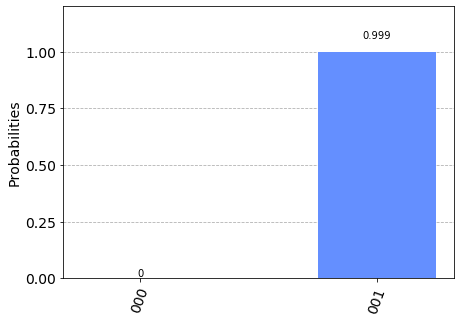

In [82]:
job_sim = execute(circ, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
plot_histogram(counts)